In [12]:
library(readxl)
library(dplyr)
library(lubridate)
library(ggplot2)

# import data
d <- read_xlsx("Data/adfc-03.xlsx", sheet= "Data")

In [13]:
# time index
d$time <- c(1:180)
d$month <- month(d$Date)

In [14]:
head(d)

Date,Sales,time,month
<dttm>,<dbl>,<int>,<dbl>
1995-01-01,1463.9,1,1
1995-02-01,1373.3,2,2
1995-03-01,1533.7,3,3
1995-04-01,1420.6,4,4
1995-05-01,1576.3,5,5
1995-06-01,1607.5,6,6


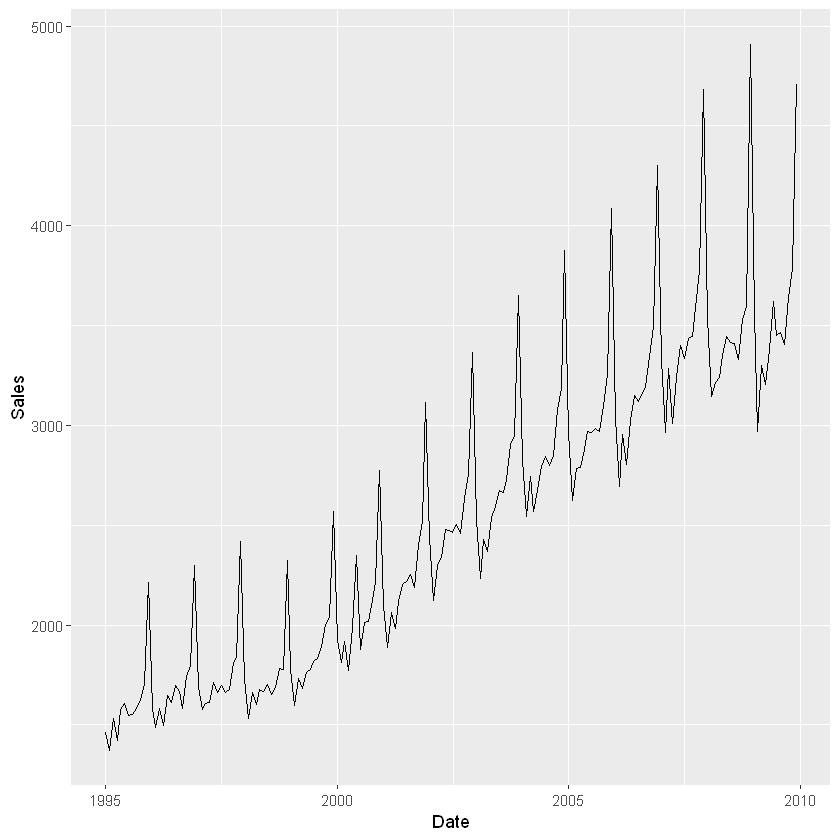

In [15]:
ggplot(aes(Date,Sales), data= d) + geom_line()

In [16]:
# trend
trend <- lm(Sales ~ time, data = d)
d$trend <-  predict(trend)

In [17]:
summary(trend)


Call:
lm(formula = Sales ~ time, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-623.15 -196.32  -48.42   80.98 1344.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1299.4127    46.4006   28.00   <2e-16 ***
time          13.4820     0.4446   30.32   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 310 on 178 degrees of freedom
Multiple R-squared:  0.8378,	Adjusted R-squared:  0.8369 
F-statistic: 919.4 on 1 and 178 DF,  p-value: < 2.2e-16


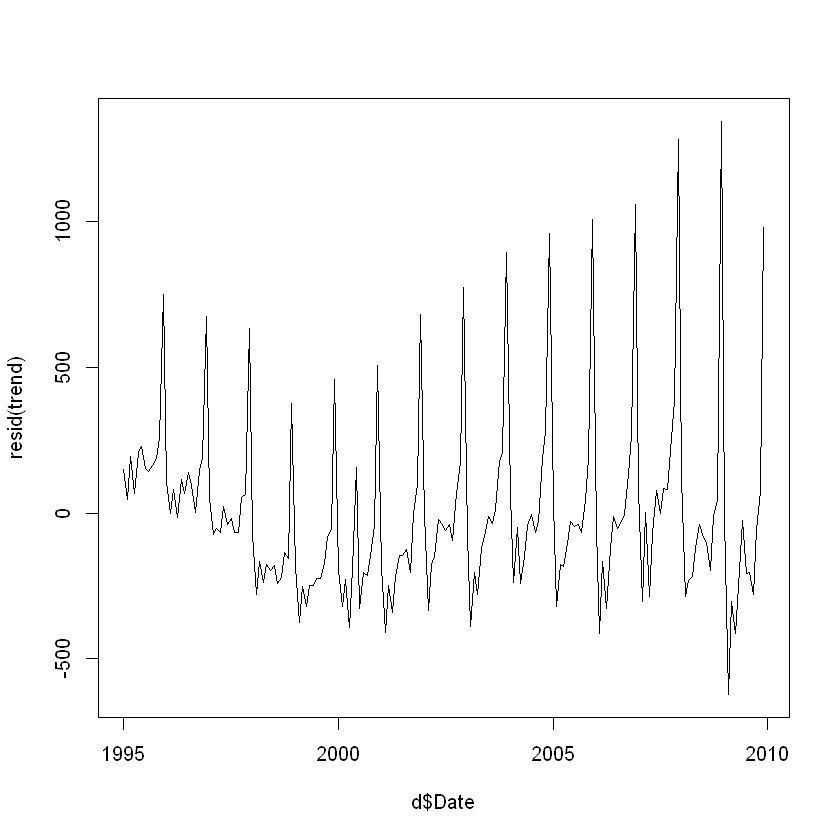

In [18]:
# linear trend residual
plot(d$Date, resid(trend), type="l")

You see repetitive model 

In [19]:
# seasonal multiplicative
d$multi <- d$Sales / d$trend 
d <- d %>% group_by(month) %>% mutate(seasonal = mean(multi))

In [20]:
head(d)

Date,Sales,time,month,trend,multi,seasonal
<dttm>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1995-01-01,1463.9,1,1,1312.895,1.115017,0.9961990
1995-02-01,1373.3,2,2,1326.377,1.035377,0.8901694
1995-03-01,1533.7,3,3,1339.859,1.144673,0.9536796
1995-04-01,1420.6,4,4,1353.341,1.049699,0.9133909
1995-05-01,1576.3,5,5,1366.823,1.153259,0.9692161
1995-06-01,1607.5,6,6,1380.305,1.164598,0.9933198


In [21]:
# model multiplicative
d$predicted <- d$trend * d$seasonal 

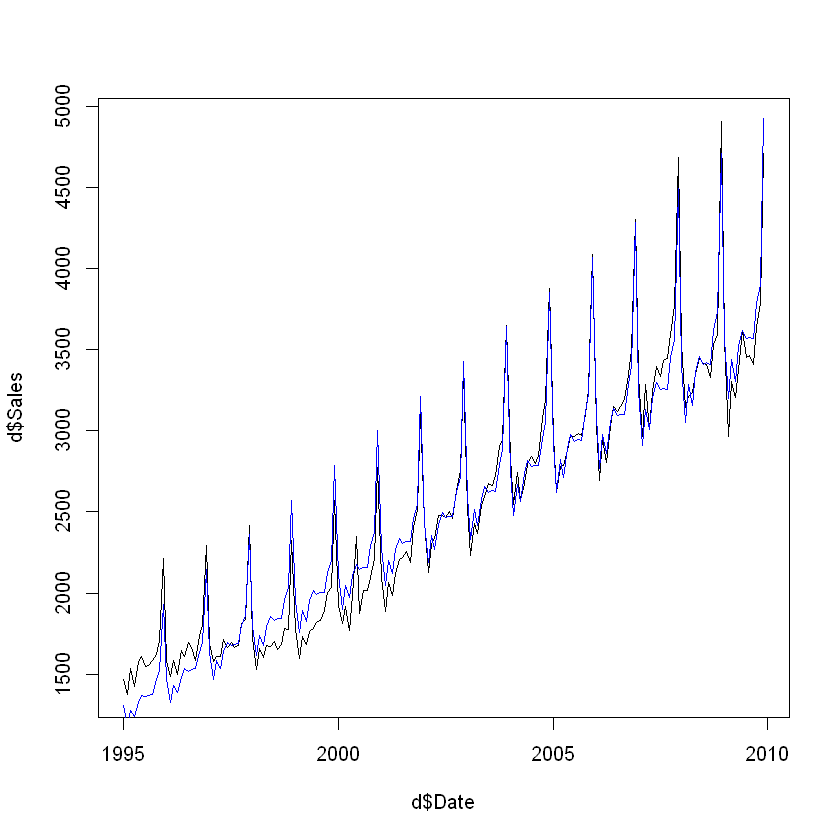

In [22]:
# plot
plot(d$Date, d$Sales, type="l")
lines(d$Date, d$predicted, type="l", col="blue") 

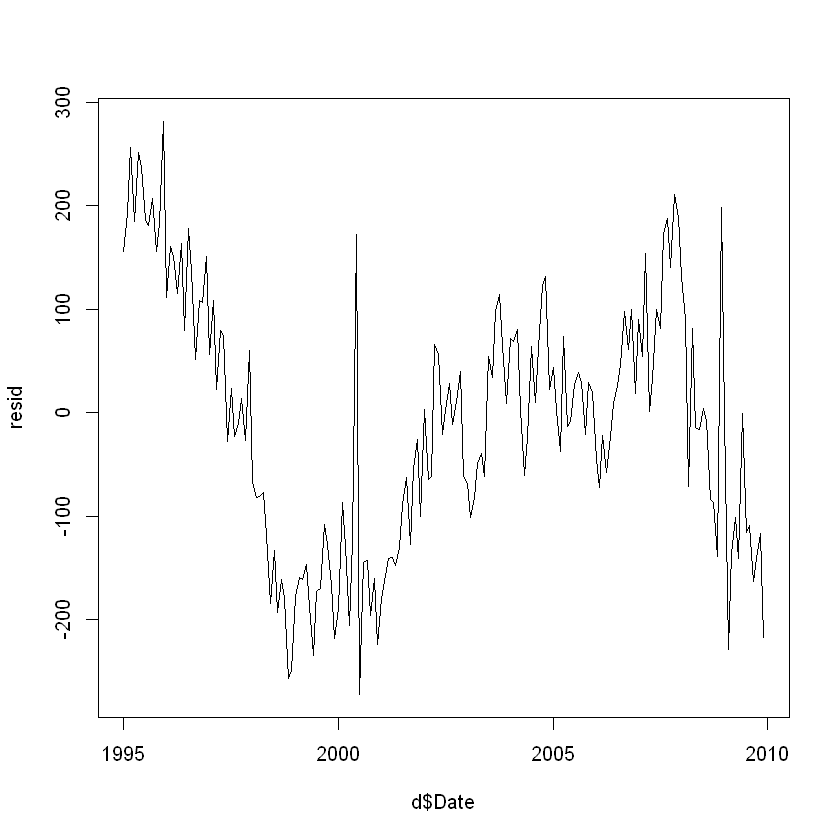

In [23]:

# residual
resid <- d$Sales - d$predicted
plot(d$Date, resid, type="l")

In [24]:
# forecast 2010
y2010 <- data.frame(time = c(181:192), seasonal = d$seasonal[1:12])
y2010$forecast <- predict(trend, y2010) * y2010$seasonal

In [25]:
# confidence limits 95%
y2010$upper <- y2010$forecast + 2 * sd(resid)
y2010$lower <- y2010$forecast - 2 * sd(resid)


In [27]:
head(y2010)

,time,seasonal,forecast,upper,lower
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,181,0.9961990,3725.439,3972.382,3478.495
2,182,0.8901694,3340.926,3587.869,3093.982
3,183,0.9536796,3592.146,3839.089,3345.202
4,184,0.9133909,3452.708,3699.651,3205.764
5,185,0.9692161,3676.800,3923.743,3429.856
6,186,0.9933198,3781.631,4028.574,3534.687
